In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

#Machine Learning packages
from sklearn.svm import SVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler	
from sklearn.metrics import confusion_matrix

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('train.csv')
data.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [3]:
train =data.copy()

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       1628 non-null   int64 
 1   Age                      1628 non-null   int64 
 2   Attrition                1628 non-null   int64 
 3   BusinessTravel           1628 non-null   object
 4   Department               1628 non-null   object
 5   DistanceFromHome         1628 non-null   int64 
 6   Education                1628 non-null   int64 
 7   EducationField           1628 non-null   object
 8   EmployeeNumber           1628 non-null   int64 
 9   EnvironmentSatisfaction  1628 non-null   int64 
 10  Gender                   1628 non-null   object
 11  JobInvolvement           1628 non-null   int64 
 12  JobRole                  1628 non-null   object
 13  JobSatisfaction          1628 non-null   int64 
 14  MaritalStatus            1628 non-null  

In [5]:
train.describe()

,Id,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,...,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.0
mean,814.500000,35.645577,0.482187,9.735258,2.884521,1000.985872,2.646192,2.650491,2.639435,5785.524570,...,3.155405,0.692260,9.949017,2.752457,6.092752,3.614865,2.049140,3.551597,3.135749,1.0
std,470.107435,9.481794,0.499836,8.306546,1.020470,585.417694,1.125283,0.736330,1.096272,4339.293147,...,0.362402,0.864808,7.482936,1.288033,5.921168,3.481051,3.138287,3.494369,1.408770,0.0
min,1.000000,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,407.750000,29.000000,0.000000,2.000000,2.000000,509.250000,2.000000,2.000000,2.000000,2625.000000,...,3.000000,0.000000,5.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.0
50%,814.500000,34.000000,0.000000,8.000000,3.000000,977.000000,3.000000,3.000000,3.000000,4304.000000,...,3.000000,0.000000,8.000000,3.000000,5.000000,2.000000,1.000000,2.000000,3.000000,1.0
75%,1221.250000,42.000000,1.000000,15.000000,4.000000,1494.000000,4.000000,3.000000,4.000000,7124.250000,...,3.000000,1.000000,13.000000,3.000000,8.000000,7.000000,2.000000,7.000000,4.000000,1.0
max,1628.000000,60.000000,1.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,4.000000,19999.000000,...,4.000000,3.000000,38.000000,6.000000,37.000000,18.000000,15.000000,17.000000,5.000000,1.0


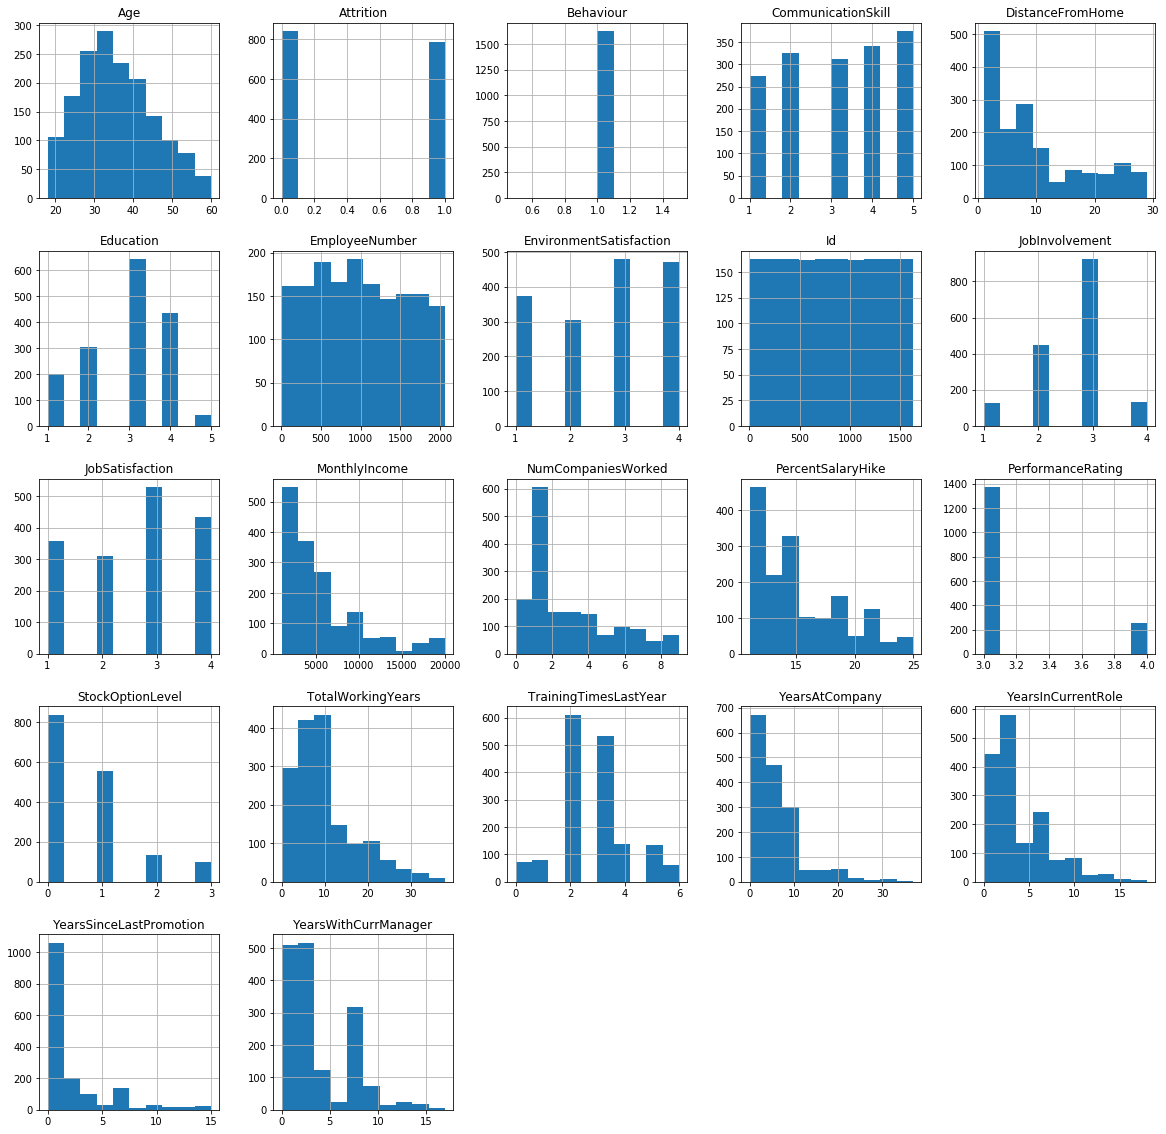

In [6]:
train.hist(figsize=(20,20))
plt.show()

In [7]:
train.columns.to_series().groupby(train.dtypes).groups

{dtype('int64'): Index(['Id', 'Age', 'Attrition', 'DistanceFromHome', 'Education',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement',
        'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
        'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
        'CommunicationSkill', 'Behaviour'],
       dtype='object'),
 dtype('O'): Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
        'MaritalStatus', 'OverTime'],
       dtype='object')}

In [8]:
train.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [9]:
from scipy.stats import norm, skew
(mu, sigma) = norm.fit(train.loc[train['Attrition'] == 1, 'Age'])
print(
    'Ex-exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(mu, sigma))
(mu, sigma) = norm.fit(train.loc[train['Attrition'] == 0, 'Age'])
print('Current exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(
    mu, sigma))


Ex-exmployees: average age = 33.7 years old and standard deviation = 9.7
Current exmployees: average age = 37.5 years old and standard deviation = 8.9


In [10]:
train['EducationField'].value_counts()

Life Sciences       623
Medical             521
Marketing           197
Technical Degree    162
Other                85
Human Resources      40
Name: EducationField, dtype: int64

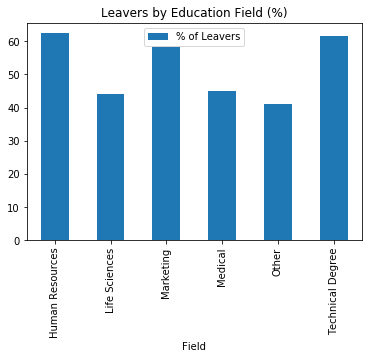

In [11]:
df_EducationField = pd.DataFrame(columns=["Field", "% of Leavers"])
i=0
for field in list(train['EducationField'].unique()):
    ratio = train[(train['EducationField']==field)&(train['Attrition']==1)].shape[0] / train[train['EducationField']==field].shape[0]
    df_EducationField.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_EF = df_EducationField.groupby(by="Field").sum()
df_EF.plot(kind='bar',title='Leavers by Education Field (%)')

In [12]:
train['Gender'].value_counts()

Male      996
Female    632
Name: Gender, dtype: int64

In [13]:
train['MaritalStatus'].value_counts()

Married     681
Single      630
Divorced    317
Name: MaritalStatus, dtype: int64

In [14]:
train['BusinessTravel'].value_counts()

Travel_Rarely        1105
Travel_Frequently     403
Non-Travel            120
Name: BusinessTravel, dtype: int64

In [15]:
train['JobRole'].value_counts()

Sales Executive              365
Research Scientist           341
Laboratory Technician        310
Sales Representative         172
Manufacturing Director       121
Healthcare Representative    110
Manager                       90
Human Resources               72
Research Director             47
Name: JobRole, dtype: int64

In [16]:
print('Average Number of Years at the company for currently active employees: {:.2f} miles and ex-employees: {:.2f} years'.format(
    train[train['Attrition'] == 0]['YearsAtCompany'].mean(), train[train['Attrition'] == 1]['YearsAtCompany'].mean()))


Average Number of Years at the company for currently active employees: 7.41 miles and ex-employees: 4.68 years


In [17]:
train['OverTime'].value_counts()

No     1000
Yes     628
Name: OverTime, dtype: int64

In [18]:
train['JobSatisfaction'].value_counts()

3    529
4    434
1    356
2    309
Name: JobSatisfaction, dtype: int64

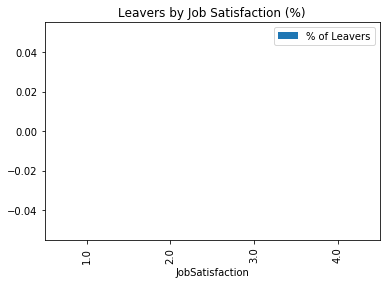

In [19]:
df_JobSatisfaction = pd.DataFrame(columns=["JobSatisfaction", "% of Leavers"])
i=0
for field in list(train['JobSatisfaction'].unique()):
    ratio = train[(train['JobSatisfaction']==field)&(train['Attrition']=="Yes")].shape[0] / train[train['JobSatisfaction']==field].shape[0]
    df_JobSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JS = df_JobSatisfaction.groupby(by="JobSatisfaction").sum()
df_JS.plot(kind='bar',title='Leavers by Job Satisfaction (%)')

In [20]:
train['Attrition'].value_counts()

0    843
1    785
Name: Attrition, dtype: int64

In [21]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    train[train['Attrition'] == 0].shape[0] / train.shape[0]*100,
    train[train['Attrition'] == 1].shape[0] / train.shape[0]*100))

Percentage of Current Employees is 51.8% and of Ex-employees is: 48.2%


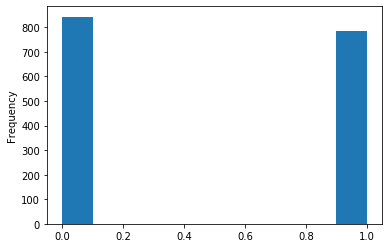

In [22]:

train['Attrition'].plot(kind='hist')

In [23]:
df_HR_trans = train.copy()
df_HR_trans['Target'] = df_HR_trans['Attrition']
df_HR_trans = df_HR_trans.drop(['Attrition','Id','Behaviour'], axis=1)
correlations = df_HR_trans.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 PerformanceRating     0.010202
NumCompaniesWorked    0.034763
CommunicationSkill    0.103379
DistanceFromHome      0.109224
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 YearsInCurrentRole     -0.269408
TotalWorkingYears      -0.262922
MonthlyIncome          -0.240479
YearsAtCompany         -0.230061
YearsWithCurrManager   -0.222752
Name: Target, dtype: float64


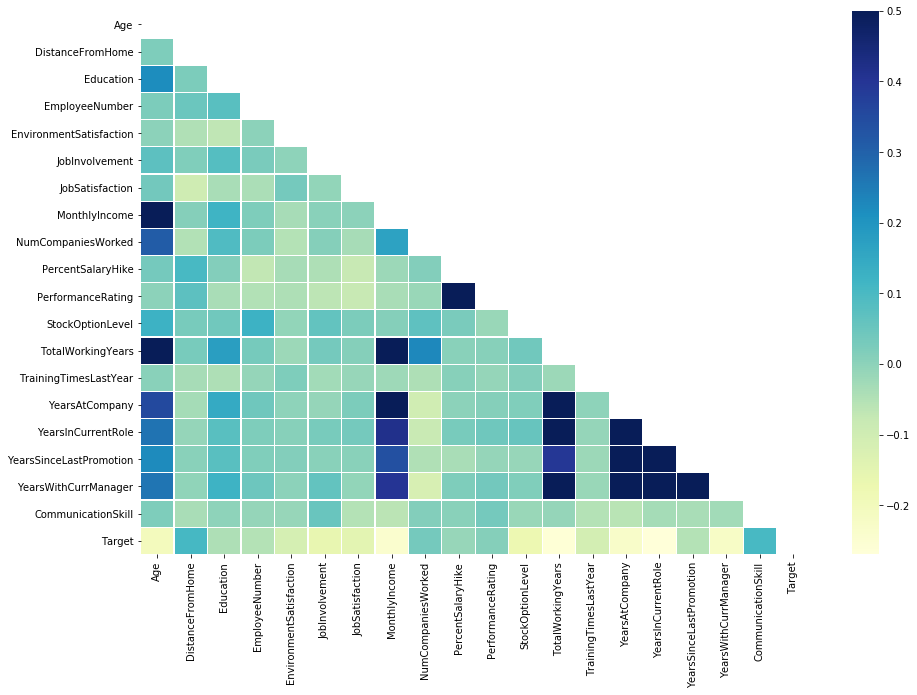

In [24]:
corr = df_HR_trans.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

In [25]:
print(train.shape)

(1628, 29)


In [26]:
train.columns.to_series().groupby(train.dtypes).groups

{dtype('int64'): Index(['Id', 'Age', 'Attrition', 'DistanceFromHome', 'Education',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement',
        'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
        'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
        'CommunicationSkill', 'Behaviour'],
       dtype='object'),
 dtype('O'): Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
        'MaritalStatus', 'OverTime'],
       dtype='object')}

In [27]:
train['BusinessTravel'].value_counts()

Travel_Rarely        1105
Travel_Frequently     403
Non-Travel            120
Name: BusinessTravel, dtype: int64

In [28]:
train['Department'].value_counts()

Research & Development    979
Sales                     568
Human Resources            81
Name: Department, dtype: int64

In [29]:
train['EducationField'].value_counts()

Life Sciences       623
Medical             521
Marketing           197
Technical Degree    162
Other                85
Human Resources      40
Name: EducationField, dtype: int64

In [30]:
train['Gender'].value_counts()

Male      996
Female    632
Name: Gender, dtype: int64

In [31]:
train['JobRole'].value_counts()

Sales Executive              365
Research Scientist           341
Laboratory Technician        310
Sales Representative         172
Manufacturing Director       121
Healthcare Representative    110
Manager                       90
Human Resources               72
Research Director             47
Name: JobRole, dtype: int64

In [32]:
train['MaritalStatus'].value_counts()

Married     681
Single      630
Divorced    317
Name: MaritalStatus, dtype: int64

In [33]:
train['OverTime'].value_counts()

No     1000
Yes     628
Name: OverTime, dtype: int64

In [34]:
train=pd.get_dummies(train)

In [35]:
train

,Id,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1,30,0,2,3,571,3,3,4,2564,...,0,0,0,0,0,0,0,1,1,0
1,2,36,0,12,4,1614,3,3,3,4663,...,1,0,0,0,0,0,1,0,0,1
2,3,55,1,2,1,842,3,3,4,5160,...,0,0,0,1,0,0,0,1,1,0
3,4,39,0,24,1,2014,1,3,4,4108,...,0,0,1,0,0,0,0,1,1,0
4,5,37,0,3,3,689,3,3,3,9434,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,1624,42,1,19,3,752,3,4,3,2759,...,0,0,1,0,0,1,0,0,0,1
1624,1625,55,1,2,1,842,3,3,4,5160,...,0,0,0,1,0,0,0,1,1,0
1625,1626,25,1,9,2,1439,1,2,1,4400,...,0,0,0,0,1,0,1,0,1,0
1626,1627,29,1,13,3,1844,1,2,1,2335,...,0,0,0,0,0,1,0,0,0,1


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Id                                 1628 non-null   int64
 1   Age                                1628 non-null   int64
 2   Attrition                          1628 non-null   int64
 3   DistanceFromHome                   1628 non-null   int64
 4   Education                          1628 non-null   int64
 5   EmployeeNumber                     1628 non-null   int64
 6   EnvironmentSatisfaction            1628 non-null   int64
 7   JobInvolvement                     1628 non-null   int64
 8   JobSatisfaction                    1628 non-null   int64
 9   MonthlyIncome                      1628 non-null   int64
 10  NumCompaniesWorked                 1628 non-null   int64
 11  PercentSalaryHike                  1628 non-null   int64
 12  PerformanceRating   

In [37]:
train=train.drop(['Id'],axis=1)

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1628 non-null   int64
 1   Attrition                          1628 non-null   int64
 2   DistanceFromHome                   1628 non-null   int64
 3   Education                          1628 non-null   int64
 4   EmployeeNumber                     1628 non-null   int64
 5   EnvironmentSatisfaction            1628 non-null   int64
 6   JobInvolvement                     1628 non-null   int64
 7   JobSatisfaction                    1628 non-null   int64
 8   MonthlyIncome                      1628 non-null   int64
 9   NumCompaniesWorked                 1628 non-null   int64
 10  PercentSalaryHike                  1628 non-null   int64
 11  PerformanceRating                  1628 non-null   int64
 12  StockOptionLevel    

In [39]:
train=train.drop(['OverTime_No','MaritalStatus_Divorced','Gender_Female'],axis=1)

In [40]:
train=train.drop(['Behaviour'],axis=1)

In [41]:
Test=pd.read_csv('test.csv')
test=Test.copy()

In [42]:
test.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,...,4,1,5,3,5,2,0,4,5,1
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,...,4,2,13,4,7,7,5,7,3,1
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,...,3,2,13,2,7,7,6,7,4,1
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,...,3,1,8,4,4,3,0,2,5,1
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,...,3,0,9,5,9,7,0,8,2,1


In [43]:
test.shape

(470, 28)

In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       470 non-null    int64 
 1   Age                      470 non-null    int64 
 2   BusinessTravel           470 non-null    object
 3   Department               470 non-null    object
 4   DistanceFromHome         470 non-null    int64 
 5   Education                470 non-null    int64 
 6   EducationField           470 non-null    object
 7   EmployeeNumber           470 non-null    int64 
 8   EnvironmentSatisfaction  470 non-null    int64 
 9   Gender                   470 non-null    object
 10  JobInvolvement           470 non-null    int64 
 11  JobRole                  470 non-null    object
 12  JobSatisfaction          470 non-null    int64 
 13  MaritalStatus            470 non-null    object
 14  MonthlyIncome            470 non-null    i

In [45]:
test.describe()

,Id,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,...,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.0
mean,235.500000,37.010638,9.293617,2.914894,1033.929787,2.708511,2.736170,2.693617,6584.874468,2.670213,...,3.155319,0.800000,11.387234,2.710638,7.070213,4.238298,2.263830,4.261702,3.051064,1.0
std,135.821574,9.166425,8.084506,1.016491,593.994868,1.089850,0.729057,1.138473,4758.485182,2.516421,...,0.362595,0.855435,7.817961,1.261744,5.900505,3.462042,3.272058,3.501693,1.413289,0.0
min,1.000000,18.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1091.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,118.250000,31.000000,2.000000,2.000000,491.500000,2.000000,2.000000,2.000000,2964.750000,1.000000,...,3.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000,1.0
50%,235.500000,35.000000,7.000000,3.000000,1042.000000,3.000000,3.000000,3.000000,5038.000000,1.000000,...,3.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000,1.0
75%,352.750000,43.000000,15.000000,4.000000,1537.750000,4.000000,3.000000,4.000000,8362.250000,4.000000,...,3.000000,1.000000,15.000000,3.000000,10.000000,7.000000,3.000000,7.000000,4.000000,1.0
max,470.000000,60.000000,29.000000,5.000000,2065.000000,4.000000,4.000000,4.000000,19943.000000,9.000000,...,4.000000,3.000000,40.000000,6.000000,40.000000,17.000000,15.000000,17.000000,5.000000,1.0


In [46]:
test=pd.get_dummies(test)

In [47]:
test.head()

,Id,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1,28,9,3,377,4,3,4,2070,1,...,0,0,1,0,0,0,1,0,1,0
1,2,31,6,4,653,1,4,4,5460,4,...,0,0,0,1,0,1,0,0,1,0
2,3,37,6,3,474,3,4,1,5974,4,...,0,0,1,0,0,1,0,0,0,1
3,4,42,1,2,827,4,2,4,6062,9,...,1,0,0,0,0,0,1,0,0,1
4,5,45,4,2,972,3,3,2,4447,1,...,0,0,0,0,0,0,1,0,1,0


In [48]:
test=pd.get_dummies(Test)

In [49]:
test.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Id                                 470 non-null    int64
 1   Age                                470 non-null    int64
 2   DistanceFromHome                   470 non-null    int64
 3   Education                          470 non-null    int64
 4   EmployeeNumber                     470 non-null    int64
 5   EnvironmentSatisfaction            470 non-null    int64
 6   JobInvolvement                     470 non-null    int64
 7   JobSatisfaction                    470 non-null    int64
 8   MonthlyIncome                      470 non-null    int64
 9   NumCompaniesWorked                 470 non-null    int64
 10  PercentSalaryHike                  470 non-null    int64
 11  PerformanceRating                  470 non-null    int64
 12  StockOptionLevel      

In [50]:
test=test.drop(['Id','Behaviour','OverTime_No','MaritalStatus_Divorced','Gender_Male'],axis=1)

In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                470 non-null    int64
 1   DistanceFromHome                   470 non-null    int64
 2   Education                          470 non-null    int64
 3   EmployeeNumber                     470 non-null    int64
 4   EnvironmentSatisfaction            470 non-null    int64
 5   JobInvolvement                     470 non-null    int64
 6   JobSatisfaction                    470 non-null    int64
 7   MonthlyIncome                      470 non-null    int64
 8   NumCompaniesWorked                 470 non-null    int64
 9   PercentSalaryHike                  470 non-null    int64
 10  PerformanceRating                  470 non-null    int64
 11  StockOptionLevel                   470 non-null    int64
 12  TotalWorkingYears     

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
train_col = list(train.columns)
train_col.remove('Attrition')
for col in train_col:
    train[col] = train[col].astype(float)
    train[[col]] = scaler.fit_transform(train[[col]])
train['Attrition'] = pd.to_numeric(train['Attrition'], downcast='float')
train.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1.428571,0.0,0.178571,2.50,1.378810,3.333333,3.333333,5.000000,0.409426,0.000000,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
1,2.142857,0.0,1.964286,3.75,3.901790,3.333333,3.333333,3.333333,0.962085,5.000000,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0
2,4.404762,1.0,0.178571,0.00,2.034349,3.333333,3.333333,5.000000,1.092944,2.222222,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
3,2.500000,0.0,4.107143,0.00,4.869376,0.000000,3.333333,5.000000,0.815956,3.888889,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0
4,2.261905,0.0,0.357143,2.50,1.664248,3.333333,3.333333,3.333333,2.218273,0.555556,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0


In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
test_col = list(test.columns)

for col in test_col:
    test[col] = test[col].astype(float)
    test[[col]] = scaler.fit_transform(test[[col]])

test.head()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1.190476,1.428571,2.50,0.898931,5.000000,3.333333,5.000000,0.259654,0.555556,4.285714,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0
1,1.547619,0.892857,3.75,1.569485,0.000000,5.000000,5.000000,1.158763,2.222222,3.928571,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
2,2.261905,0.892857,2.50,1.134597,3.333333,5.000000,0.000000,1.295088,2.222222,0.714286,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0
3,2.857143,0.000000,1.25,1.992225,5.000000,1.666667,5.000000,1.318428,5.000000,0.714286,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0
4,3.214286,0.535714,1.25,2.344509,3.333333,3.333333,1.666667,0.890091,0.555556,0.357143,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0


In [54]:
data=train.drop(['Attrition'],axis=1)
target=train['Attrition']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)  

In [56]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1221, 44)
Number transactions y_train dataset:  (1221,)
Number transactions X_test dataset:  (407, 44)
Number transactions y_test dataset:  (407,)


In [57]:
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [58]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

In [59]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
1,Random Forest,99.90,0.18,97.38,1.26
2,SVM,99.83,0.18,97.13,1.57
4,Decision Tree Classifier,92.42,2.60,92.06,2.96
0,Logistic Regression,86.10,3.27,77.89,3.84
3,KNN,83.16,3.08,76.17,3.41
5,Gaussian NB,76.05,3.68,61.67,4.42


In [60]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    print(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

[0.8403183  0.86207827 0.83512931 0.89583333 0.88316993 0.86444805
 0.85155196 0.8188172  0.93091398 0.82794808]
[0.99907162 1.         0.99946121 1.         1.         0.99945887
 0.99986505 0.9936828  0.99865591 1.        ]
[1.         0.99622132 0.99676724 0.99864719 0.99972767 0.99621212
 1.         0.99569892 1.         1.        ]
[0.82692308 0.86477733 0.87998384 0.85849567 0.83442266 0.78368506
 0.78879892 0.85322581 0.81330645 0.81206849]
[0.88461538 0.92105263 0.96012931 0.92424242 0.97222222 0.93939394
 0.92307692 0.90322581 0.91935484 0.8943662 ]
[0.73740053 0.75546559 0.72346444 0.79897186 0.81985294 0.73133117
 0.71767881 0.81962366 0.73924731 0.76222038]


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
1,Random Forest,99.90,0.18,97.38,1.26
2,SVM,99.83,0.18,97.13,1.57
4,Decision Tree Classifier,92.42,2.60,92.06,2.96
0,Logistic Regression,86.10,3.27,77.89,3.84
3,KNN,83.16,3.08,76.17,3.41
5,Gaussian NB,76.05,3.68,61.67,4.42


In [61]:
rf=RandomForestClassifier(n_estimators=100, random_state=7)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [62]:
Y_pred = rf.predict(X_test)

In [63]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

AUC score (STD): 0.86 (0.03)


Text(0.5, 257.44, 'Predicted label')

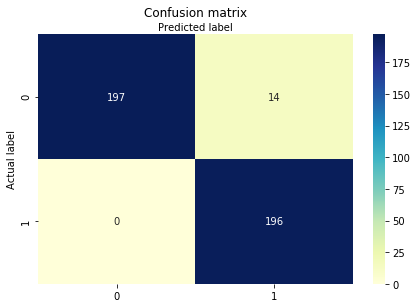

In [65]:
cnf_matrix = metrics.confusion_matrix(y_test, rf.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [66]:
print('Accuracy of RandomForest Regression Classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)*100))

Accuracy of RandomForest Regression Classifier on test set: 96.56


In [71]:
pred = rf.predict(test)
len(pred)

470

In [72]:
result = pd.concat([Test['Id'], pd.Series(pred)], axis=1)
result.columns = ['Id', 'Attrition']

In [73]:
result

,Id,Attrition
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
465,466,1.0
466,467,1.0
467,468,0.0
468,469,0.0
